# Prediction Gold Price

### Importing all dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Loading

In [3]:
# loading dataset
gold_dataset = pd.read_csv("../data/gld_price_data.csv")

In [4]:
# display dataset
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# shape
gold_dataset.shape

(2290, 6)

In [6]:
# information extraction
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [37]:
# statistical measures of dataset
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [56]:
# Data Correlation
correlation = gold_dataset.corr(numeric_only = True)

<Axes: >

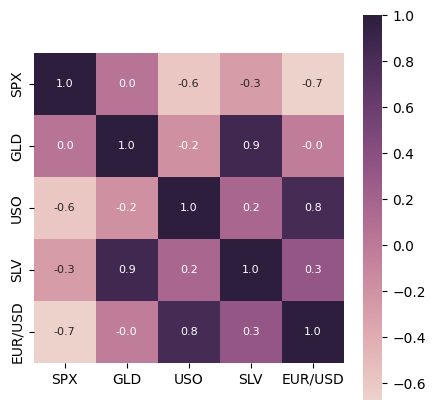

In [57]:
# construct heatmap to visualise correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {"size": 8}, cmap = sns.cubehelix_palette(as_cmap=True))

In [58]:
# correlation values
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/qq/y09m4gz50fb4sx0tqzv6tr100000gp/T/ipykernel_5575/4047822038.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset["GLD"], color = "blue")


<Axes: xlabel='GLD', ylabel='Density'>

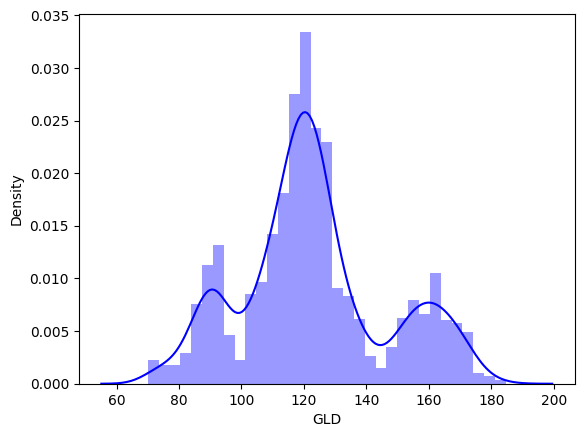

In [59]:
# distribution of gold price
sns.distplot(gold_dataset["GLD"], color = "blue")

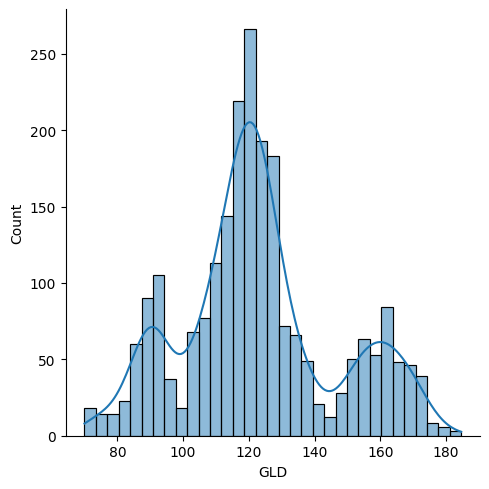

In [60]:
# distribution of gold price
sns.displot(gold_dataset["GLD"], kde=True)

### Split Train and Test Data

In [61]:
# separating features and target
X = gold_dataset.drop(["GLD", "Date"], axis = 1)
Y = gold_dataset["GLD"]

In [62]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [63]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [64]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (2290, 4)
Train data:  (1832, 4)
Test data:  (458, 4)


In [65]:
print(X_train)
print(Y_train)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]
476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64


### Model training using Random Forest Regressor

In [66]:
regressor = RandomForestRegressor()

In [67]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

In [68]:
# prediciton on train data
train_data_prediciton = regressor.predict(X_train)
# R squared error
train_error_score = metrics.r2_score(train_data_prediciton, Y_train)
print("R squared error: ", train_error_score)

R squared error:  0.9984667936370217


In [69]:
# prediciton on test data
test_data_prediciton = regressor.predict(X_test)
# R squared error
test_error_score = metrics.r2_score(test_data_prediciton, Y_test)
print("R squared error: ", test_error_score)

R squared error:  0.9894818571563094


### Visualise actual and predicted values

In [70]:
Y_test = list(Y_test)

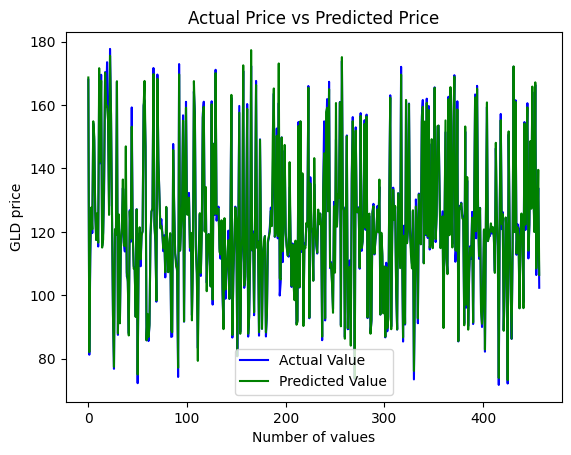

In [71]:
plt.plot(Y_test, color = "blue", label = "Actual Value")
plt.plot(test_data_prediciton, color = "green", label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()